## Chi-squared Distribution

The [Chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution#Sample_mean) with $k$ degrees of freedom, denoted $\chi^2_k$, is the distribution of is the sum of the squares of $k$ independent standard normals:

\begin{equation}
Q = \sum_{i=1}^{k}Z_i^2, \qquad
Z_i \sim \mathcal{N}(0, 1), \qquad
Z_i \perp Z_j \, \forall \, i \neq j.
\end{equation}

Let's look at its PDF for different values of $k$:

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

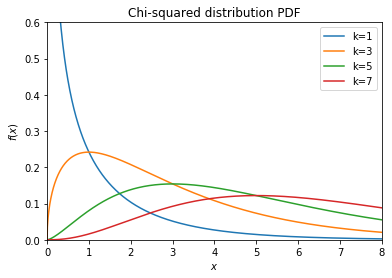

In [2]:
xs = np.linspace(0, 8, 1000)

for k in range(1, 9, 2):
    plt.plot(xs, stats.chi2.pdf(xs, k), label='k={0}'.format(k))

plt.ylim(0, 0.6)
plt.xlim(0, 8)
plt.title("Chi-squared distribution PDF")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend();

Note that the domain of $\chi^2_k$ is positive numbers only. It's easy to compute its mean:

\begin{equation}
\mathbb{E}[Q]
    = \sum_{i=1}^{k}\mathbb{E}[Z_i^2]
    = \sum_{i=1}^{k}1
    = k.
\end{equation}

Let's also compute the second moment:

\begin{align*}
\mathbb{E}[Q^2]
    &= \sum_{i,j=1}^{k}\mathbb{E}[Z_i^2 Z_j^2] \\
    &= \sum_{i,j=1}^{k}\mathbb{E}[Z_i^4] \delta_{ij} + \mathbb{E}[Z_i^2] \mathbb{E}[Z_j^2] (1 - \delta_{ij}) \\
    &= \sum_{i,j=1}^{k}3 \delta_{ij} + (1 - \delta_{ij}) \\
    &= 2k + k^2,
\end{align*}

where the second equality follows from the fact that $Z_i$ and $Z_j$ are independent for all $i\neq j$. Therefore, the variance of $Q$ is given by:

\begin{equation}
\text{Var}[Q]
    = \mathbb{E}[Q^2] - \mathbb{E}[Q]^2
    = 2k.
\end{equation}

Let's verify the PDF of $\chi^2_3$ empirically by simulating standard normals:

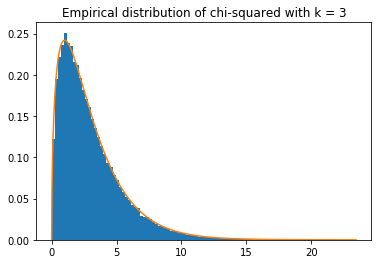

In [3]:
# Make numbers reproducible
np.random.seed(123)

# Create matrix where every row contains a realization of Z_1, Z_2, Z_3.
Z = np.random.normal(size=(50000, 3))
# Compute realization of Q
Q = (Z**2).sum(axis=1)

xs = np.linspace(0, np.max(Q), 1000)
plt.hist(Q, bins=100, normed=True)
plt.plot(xs, stats.chi2.pdf(xs, 3))
plt.title("Empirical distribution of chi-squared with k = 3");

$\chi^2$ comes up quite often in the context of hypothesis testing and confidence intervals. Let's look at an example.

## Sample variance distribution

Suppose $x_1, x_2, \dots, x_N$ are independent samples of $\mathcal{N}(\mu, \sigma^2)$. Then

\begin{equation}
Q \equiv \frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i - \bar{x})^2 \sim \chi^2_{N-1},
\end{equation}

where $\bar{x}$ is the sample mean. Note that $Q$ is related to the sample variance $\hat{\sigma}^2$:

\begin{equation}
Q = (N - 1) \frac{\hat{\sigma}^2}{\sigma^2}, \qquad
\hat{\sigma}^2 = \frac{1}{N - 1}\sum_{i=1}^{n}(x_i - \bar{x})^2.
\end{equation}

We will prove the claim that $Q$ has the chi-squared distribution with $N-1$ degrees of freedom. Before doing that, though, let's verify it empirically:

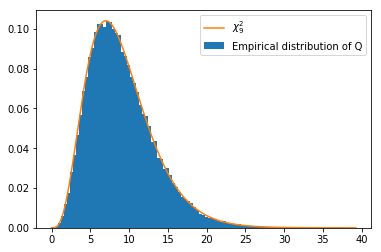

In [4]:
mu = 1.0
sigma = 2.0
N = 10
trials = 50000
# Simulate (x_1, ..., x_10) many times
x = np.random.normal(loc=mu, scale=sigma, size=(trials, N))
# Compute sample mean of each trial
xbar = np.mean(x, axis=1).reshape((trials, 1))
# Compute Q for every trial
Q = np.sum((x - xbar)**2, axis=1) / sigma**2

# Plot
xs = np.linspace(0, np.max(Q), 1000)
plt.hist(Q, bins=100, normed=True, label='Empirical distribution of Q')
plt.plot(xs, stats.chi2.pdf(xs, N - 1), label=r'$\chi^2_{0}$'.format(N-1))
plt.legend();

To prove $Q \sim \chi^2_{N-1}$, we will make use of the following result:

**Claim** Let $Z$ denote an $n$-dimensional vector of independent standard normals. Also, let $M$ be an $n \times n$ idempotent matrix (i.e. $M^T=M$ and $M^2=M$) of rank $n-k$. Then:

\begin{equation}
Z^T M Z \sim \chi^2_{n-k}.
\end{equation}

**Proof** Since $M$ is idempotent, its eigenvalues are either $1$ or $0$. Moreover, there are $n-k$ eigenvectors with eigenvalue $1$, since the number of eigenvectors with non-zero eigenvalues is given by the rank of $M$. Let $v_1, \dots, v_{n-k}$ denote these eigenvectors. Then:

\begin{equation}
M = \sum_{i=1}^{n-k}v_iv_i^T, \qquad
v_i^Tv_j = \delta_{ij}.
\end{equation}

(To confirm that this representation of $M$ is correct, it's enough to check that $Mv_i=v_i$.) We can now rewrite $Z^T M Z$ as

\begin{align*}
Z^T M Z
    &= Z^T \left[\sum_{i=1}^{n-k}v_iv_i^T \right] Z \\
    &= \sum_{i=1}^{n-k}(Z^Tv_i)(v_i^TZ) \\
    &= \sum_{i=1}^{n-k}(v_i^TZ)^2 \\
    &= \sum_{i=1}^{n-k}y_i^2,
\end{align*}

where we've used $Z^Tv_i=(v_i^TZ)^T=v_i^TZ$ since $v_i^TZ$ is a scalar and introduced

\begin{equation}
y_i \equiv v_i^TZ = Z^Tv_i.
\end{equation}

By definition, $Z$ is a multivariate Gaussian with 0 mean and covariance matrix $I_n$, where $I_n$ is the $n$-dimensional identity matrix. Since $y_i$ are linear combinations of $Z_1, \dots, Z_n$, they too have a multivariate Gaussian distribution. Let's work out their mean and covariance matrix:

\begin{equation}
\mathbb{E}[y_i] = v_i^T \mathbb{E}[Z] = 0.
\end{equation}

\begin{align*}
\mathbb{E}[y_iy_j]
    &= \mathbb{E}[(v_i^TZ)(Z^Tv_j)] \\
    &= v_i^T \mathbb{E}[ZZ^T] v_j \\
    &= v_i^T I_n v_j \\
    &= v_i^T v_j \\
    &= \delta_{ij}.
\end{align*}

Therefore, $y_1, \dots, y_{n-k}$ are independent standard normals. This concludes the proof, since $Z^T M Z = y_1^2 + \dots + y_{n-k}^2 \sim \chi^2_{n-k}$.

What does this have to do with the distribution of $Q$?

\begin{align*}
x_i - \bar{x}
    &= (x_i - \mu) - (\bar{x} - \mu) \\
    &= (x_i - \mu) - \frac{1}{n}\sum_{j=1}^{n}(x_j - \mu) \\
    &= \sum_{j=1}^{n}(\delta_{ij} - 1/n)(x_j - \mu) \\
    &= \sum_{j=1}^{n}M_{ij}(x_j - \mu),
\end{align*}

where

\begin{equation}
M_{ij} \equiv \delta_{ij} - 1/n.
\end{equation}

Note that $M$ is symmetric ($M_{ij}=M_{ji}$) and idempotent:

\begin{align*}
M^2_{ij}
    &= \sum_{k=1}^{n}M_{ik}M_{kj} \\
    &= \sum_{k=1}^{n}(\delta_{ik} - 1/n)(\delta_{kj} - 1/n) \\
    &= \sum_{k=1}^{n}(\delta_{ik}\delta_{kj} - 1/n\delta_{ik} - 1/n\delta_{kj} + 1/n^2) \\
    &= \delta_{ij} - 1/n - 1/n + 1/n \\
    &= \delta_{ij} - 1/n \\
    &= M_{ij}.
\end{align*}

Also,

\begin{align*}
\frac{x_i - \bar{x}}{\sigma}
    &= \sum_{j=1}^{n}M_{ij}\frac{x_j - \mu}{\sigma} \\
    &= [MZ]_{i}
\end{align*}

where we've define the vector $Z$:

\begin{equation}
Z_i \equiv \frac{x_i - \mu}{\sigma}.
\end{equation}

Since we're assuming $x_i$ are independent samples of $\mathcal{N}(\mu, \sigma^2)$, $Z$ is an $n$-dimensional vector of independent standard normals. We can now express $Q$ as follows:

\begin{align*}
Q
    &= \sum_{i=1}^{n}\left(\frac{x_i - \bar{x}}{\sigma}\right)^2 \\
    &= \sum_{i=1}^{n}[MZ]_{i}^2 \\
    &= (MZ)^T(MZ) \\
    &= Z^TM^TMZ \\
    &= Z^TMZ,
\end{align*}

where the second last equality uses the fact that $M$ is idempotent. Above we proved that $Z^TMZ \sim \chi^2_{\text{rank}(M)}$, so all that's left to do is compute the rank of $M$. Since $M$'s eigenvalues are either $0$ or $1$, its rank, which is equal to the number of eigenvectors with non-zero eigenvalues, is also equal to the sum of its eigenvalues, which is in turn equal to its trace. So:

\begin{align*}
\text{rank}(M)
    &= \text{tr}(M) \\
    &= \sum_{i=1}^{n}M_{ii} \\
    &= \sum_{i=1}^{n}(\delta_{ii} - 1/n) \\
    &= \sum_{i=1}^{n}(1 - 1/n) \\
    &= n - 1.
\end{align*}

This concludes the proof: $Q = Z^TMZ \sim \chi^2_{\text{rank}(M)} = \chi^2_{N-1}$.


## Confidence interval for sample variance

We just proved that

\begin{equation}
Q \equiv (N - 1) \frac{\hat{\sigma}^2}{\sigma^2} \sim \chi^2_{N-1}.
\end{equation}

We can now use this to build a confidence interval for $\sigma$: given a confidence level $1-\alpha$ (e.g. $\alpha = 5\%$), we will find $\sigma_L$ and $\sigma_U$ such that the probability of the interval $(\sigma_L, \sigma_U)$ containing $\sigma$ is $1-\alpha$. Let $\Phi^{-1}_{N-1}$ denote the inverse CDF of $\chi^2_{N-1}$. Then:

\begin{align*}
1 - \alpha
    & = \text{Pr}\left(\Phi^{-1}_{N-1}(\alpha/2) \le Q \le \Phi^{-1}_{N-1}(1-\alpha/2)\right) \\
    & = \text{Pr}\left(\Phi^{-1}_{N-1}(\alpha/2) \le (N - 1) \frac{\hat{\sigma}^2}{\sigma^2} \le \Phi^{-1}_{N-1}(1-\alpha/2)\right) \\
    & = \text{Pr}\left(\frac{1}{\Phi^{-1}_{N-1}(1-\alpha/2)} \le \frac{\sigma^2}{(N-1)\hat{\sigma}^2} \le \frac{1}{\Phi^{-1}_{N-1}(\alpha/2)}\right) \\
    & = \text{Pr}\left(\frac{(N-1)\hat{\sigma}^2}{\Phi^{-1}_{N-1}(1-\alpha/2)} \le \sigma^2 \le \frac{(N-1)\hat{\sigma}^2}{\Phi^{-1}_{N-1}(\alpha/2)}\right) \\
    & = \text{Pr}\left(\sqrt{\frac{(N-1)}{\Phi^{-1}_{N-1}(1-\alpha/2)}}\hat{\sigma} \le \sigma \le \sqrt{\frac{(N-1)}{\Phi^{-1}_{N-1}(\alpha/2)}}\hat{\sigma}\right).
\end{align*}

Therefore:

\begin{equation}
\sigma_L = \sqrt{\frac{(N-1)}{\Phi^{-1}_{N-1}(1-\alpha/2)}}\hat{\sigma}, \qquad
\sigma_U = \sqrt{\frac{(N-1)}{\Phi^{-1}_{N-1}(\alpha/2)}}\hat{\sigma}.
\end{equation}

Let's look at an example:

In [5]:
alpha = 0.05
N = 100
s = np.random.normal(size=N)
sigma_hat = np.std(s, ddof=1)
sigma_l = np.sqrt((N - 1) / stats.chi2.ppf(1 - alpha/2., N-1)) * sigma_hat
sigma_u = np.sqrt((N - 1) / stats.chi2.ppf(alpha/2., N-1)) * sigma_hat

print("95% confidence interval for standard deviation: ({0}, {1})".format(sigma_l, sigma_u))

95% confidence interval for standard deviation: (0.833068844971, 1.10221858545)


`scipy` also has a function for getting this confidence interval:

In [6]:
_, _, sigma_ci = stats.bayes_mvs(s, 1 - alpha)
sigma_ci.minmax

(0.8330688449714693, 1.1022185854542772)

## Ratio of sample variances

Suppose $x_1, x_2, \dots, x_N$ are independent samples of $\mathcal{N}(\mu_x, \sigma_x^2)$, and that $y_1, y_2, \dots, y_M$ are independent samples of $\mathcal{N}(\mu_y, \sigma_y^2)$. Furthermore, assume that $x$ and $y$ are independent. From the previous sections we know that

\begin{equation}
Q_x \equiv (N - 1) \frac{\hat{\sigma}_x^2}{\sigma_x^2} \sim \chi^2_{N-1}, \qquad
Q_y \equiv (M - 1) \frac{\hat{\sigma}_y^2}{\sigma_y^2} \sim \chi^2_{M-1}.
\end{equation}

Consider now the following quantity:

\begin{equation}
f \equiv \frac{Q_x / (N - 1)}{Q_y / (M - 1)} = \frac{\hat{\sigma}_x^2/\sigma_x^2}{\hat{\sigma}_y^2/\sigma_y^2}.
\end{equation}

As it turns out, $f$ follows the [F distribution](https://en.wikipedia.org/wiki/F-distribution) with parameters $N-1$ and $M-1$: $f \sim F_{N-1, M-1}$. The reason is that $Q_x$ has the chi-squared distribution with $N-1$ degrees of freedom, $Q_y$ has the chi-squared distribution with $M-1$ degrees of freedom, and $Q_x$ and $Q_y$ are independent (since by assumption $x$ and $y$ are independent). We can use this to construct a confidence interval for the ratio $\sigma_x / \sigma_y$. Let $\Phi^{-1}_{N-1,M-1}$ denote the inverse CDF of $F_{N-1, M-1}$. Then:

\begin{align*}
1 - \alpha
    & = \text{Pr}\left(\Phi^{-1}_{N-1,M-1}(\alpha/2) \le f \le \Phi^{-1}_{N-1,M-1}(1-\alpha/2)\right) \\
    & = \text{Pr}\left(\Phi^{-1}_{N-1,M-1}(\alpha/2) \le \frac{\hat{\sigma}_x^2/\sigma_x^2}{\hat{\sigma}_y^2/\sigma_y^2} \le \Phi^{-1}_{N-1,M-1}(1-\alpha/2)\right) \\
    & = \text{Pr}\left(\Phi^{-1}_{N-1,M-1}(\alpha/2) \frac{\hat{\sigma}_y^2}{\hat{\sigma}_x^2} \le \frac{\sigma_y^2}{\sigma_x^2} \le \Phi^{-1}_{N-1,M-1}(1-\alpha/2) \frac{\hat{\sigma}_y^2}{\hat{\sigma}_x^2}\right) \\
    & = \text{Pr}\left(\frac{1}{\Phi^{-1}_{N-1,M-1}(1-\alpha/2)} \frac{\hat{\sigma}_x^2}{\hat{\sigma}_y^2} \le \frac{\sigma_x^2}{\sigma_y^2} \le \frac{1}{\Phi^{-1}_{N-1,M-1}(\alpha/2)} \frac{\hat{\sigma}_x^2}{\hat{\sigma}_y^2}\right) \\
    & = \text{Pr}\left(\frac{1}{\sqrt{\Phi^{-1}_{N-1,M-1}(1-\alpha/2)}} \frac{\hat{\sigma}_x}{\hat{\sigma}_y} \le \frac{\sigma_x}{\sigma_y} \le \frac{1}{\sqrt{\Phi^{-1}_{N-1,M-1}(\alpha/2)}} \frac{\hat{\sigma}_x}{\hat{\sigma}_y}\right).
\end{align*}

Therefore, the probability that the interval $\left(\sqrt{1/\Phi^{-1}_{N-1,M-1}(1-\alpha/2)}\hat{\sigma}_x/\hat{\sigma}_y, \sqrt{1/\Phi^{-1}_{N-1,M-1}(\alpha/2)}\hat{\sigma}_x/\hat{\sigma}_y\right)$ contains $\sigma_x/\sigma_y$ is $1-\alpha$.

Below we will consider the following example: $N=1000$, $\mu_x=0$, $\sigma_x=1$, $M=500$, $\mu_y=1$, $\sigma_y=2$.

In [7]:
# Generate x samples
N = 1000
xs = np.random.normal(size=N)
sigmax_hat = np.std(xs, ddof=1)

# Generate y samples
M = 500
ys = np.random.normal(loc=1, scale=2, size=M)
sigmay_hat = np.std(ys, ddof=1)

f_l = np.sqrt(1/stats.f.ppf(1-alpha/2, N-1, M-1)) * sigmax_hat/sigmay_hat
f_u = np.sqrt(1/stats.f.ppf(alpha/2, N-1, M-1)) * sigmax_hat/sigmay_hat
print("95% confidence interval for sigma_x/sigma_y: ({0}, {1})".format(f_l, f_u))

95% confidence interval for sigma_x/sigma_y: (0.449043220305, 0.522803004333)


The confidence interval does in fact contain $\sigma_x/\sigma_y=1/2$.